## Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from pathlib import Path
from statsmodels.tsa.stattools import adfuller
plt.style.use("ggplot")

## Data

In [5]:
PATH_DATA = Path("../Data/")

In [12]:
df = pd.read_csv(PATH_DATA / "british airways.csv", parse_dates=["Date"])

In [13]:
df

,Date,Adjusted Passenger Count
0,2005-07-01,21686
1,2005-08-01,20084
2,2005-09-01,20635
3,2005-10-01,18988
4,2005-11-01,15554
...,...,...
124,2015-11-01,19800
125,2015-12-01,17560
126,2016-01-01,18397
127,2016-02-01,16230


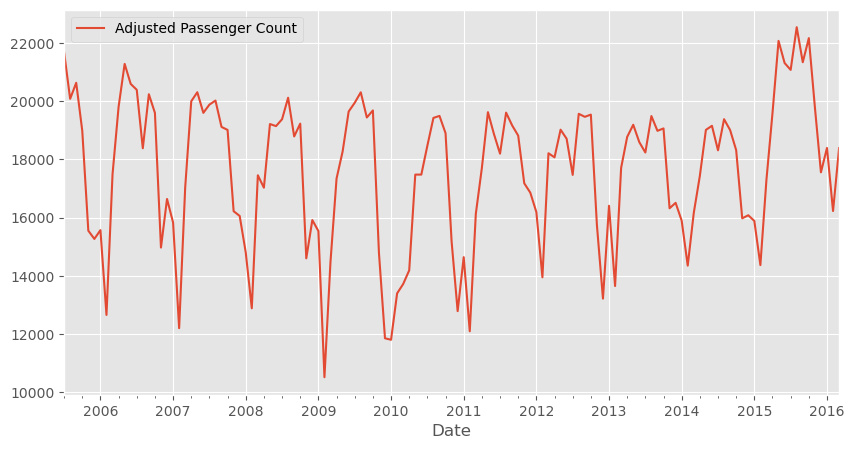

In [15]:
df.plot(x="Date", y="Adjusted Passenger Count", figsize=(10, 5));

In [17]:
pct_train = 0.8
n_train = int(pct_train * len(df))
train = df.iloc[:n_train]
test = df.iloc[n_train:]

In [20]:
train.shape, test.shape

((103, 2), (26, 2))

In [22]:
adfuller(train["Adjusted Passenger Count"])[1] # p-value

0.5400737757982487

In [23]:
prophet_initial = Prophet()
prophet_initial.fit(train.rename(columns={"Date": "ds", "Adjusted Passenger Count": "y"}))

14:57:01 - cmdstanpy - INFO - Chain [1] start processing
14:57:01 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = prophet_initial.make_future_dataframe(periods=len(test), freq="M")
future

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/forecaster.py:1796: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
0,2005-07-01
1,2005-08-01
2,2005-09-01
3,2005-10-01
4,2005-11-01
...,...
124,2015-10-31
125,2015-11-30
126,2015-12-31
127,2016-01-31


In [26]:
forecast = prophet_initial.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-01,18527.932878,19069.547053,21414.322500,18527.932878,18527.932878,1703.398985,1703.398985,1703.398985,1703.398985,1703.398985,1703.398985,0.0,0.0,0.0,20231.331863
1,2005-08-01,18495.488576,19363.021235,21787.523116,18495.488576,18495.488576,2143.015183,2143.015183,2143.015183,2143.015183,2143.015183,2143.015183,0.0,0.0,0.0,20638.503759
2,2005-09-01,18463.044275,19150.222744,21609.389255,18463.044275,18463.044275,1936.032976,1936.032976,1936.032976,1936.032976,1936.032976,1936.032976,0.0,0.0,0.0,20399.077250
3,2005-10-01,18431.646563,18917.249188,21414.061771,18431.646563,18431.646563,1719.514237,1719.514237,1719.514237,1719.514237,1719.514237,1719.514237,0.0,0.0,0.0,20151.160800
4,2005-11-01,18399.202261,15155.804679,17702.902027,18399.202261,18399.202261,-1988.588090,-1988.588090,-1988.588090,-1988.588090,-1988.588090,-1988.588090,0.0,0.0,0.0,16410.614172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2015-10-31,18497.178528,16088.711040,18581.556371,18391.510641,18606.125268,-1145.810911,-1145.810911,-1145.810911,-1145.810911,-1145.810911,-1145.810911,0.0,0.0,0.0,17351.367616
125,2015-11-30,18522.096499,15970.468307,18519.153608,18405.778542,18639.499793,-1235.272169,-1235.272169,-1235.272169,-1235.272169,-1235.272169,-1235.272169,0.0,0.0,0.0,17286.824330
126,2015-12-31,18547.845069,14299.211650,16779.722228,18424.480586,18675.104065,-3000.972632,-3000.972632,-3000.972632,-3000.972632,-3000.972632,-3000.972632,0.0,0.0,0.0,15546.872437
127,2016-01-31,18573.593640,13104.594219,15654.759261,18441.674282,18706.893965,-4193.497134,-4193.497134,-4193.497134,-4193.497134,-4193.497134,-4193.497134,0.0,0.0,0.0,14380.096506


/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


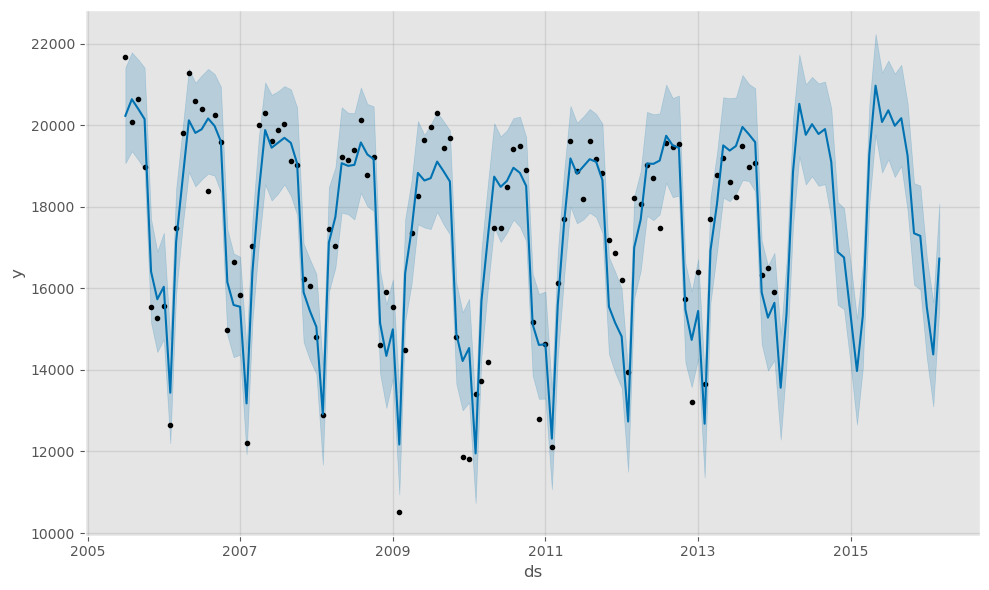

In [27]:
prophet_initial.plot(forecast);

/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/phili/miniconda3/envs/max_supported_env/lib/python3.9/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

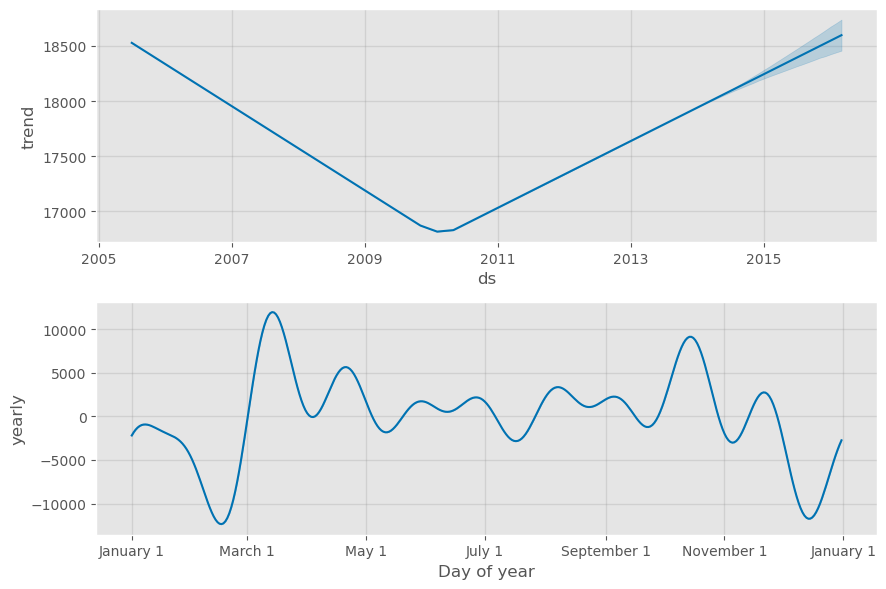

In [28]:
prophet_initial.plot_components(forecast);

In [29]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse(test["Adjusted Passenger Count"], forecast["yhat"].iloc[-len(test):])

1469.202780867335